# Create Analytical District Data


1. Load Data
2. Feature Engineering
3. Process Data
4. Dimensionality Reduction
5. Cluster Modeling

In [1]:
import os

import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
# Primary Dataset
lc_data = pd.read_csv("analytical_data/lc_data.csv")

# Contraceptive usage by month
ccm_data = pd.read_csv("analytical_data/ccm_data.csv")

# Contraceptive usage by year
cca_data = pd.read_csv("final_data/contraceptive_case_data_annual.csv")

# Site data
site_data = pd.read_csv("analytical_data/augmented_site_info.csv")


### Data treatment

In [4]:
len(ccm_data["district"].unique())
#.head()
ccm_data.columns

Index(['district', 'month', 'year', 'implant_women_old', 'implant_women_new',
       'injection2_women_old', 'injection2_women_new', 'injection3_women_old',
       'injection3_women_new', 'pill_women_old', 'pill_women_new',
       'iud_women_old', 'iud_women_new', 'iud_number_dispensed',
       'implant_number_dispensed', 'injection2_number_dispensed',
       'injection3_number_dispensed', 'pill_number_dispensed',
       'iud_number_received', 'implant_number_received',
       'injection2_number_received', 'injection3_number_received',
       'pill_number_received', 'iud_stock_end', 'implant_stock_end',
       'injection2_stock_end', 'injection3_stock_end', 'pill_stock_end',
       'year_month'],
      dtype='object')

In [5]:
#lc_data.head()
lc_data.columns

Index(['year', 'month', 'region', 'district', 'site_code', 'product_code',
       'stock_initial', 'stock_received', 'stock_distributed',
       'stock_adjustment', 'stock_end', 'average_monthly_consumption',
       'stock_stockout_days', 'stock_ordered', 'year_month'],
      dtype='object')

In [6]:
# Either will drop 2019 or have to adjust it with the data we have for that year
by_district_lc_data = lc_data.copy()
lc_data_numeric = ["stock_received","stock_distributed","stock_adjustment",
    "average_monthly_consumption","stock_stockout_days"]#,"stock_change"]

by_district_lc_data['year'] = by_district_lc_data['year'].astype(str)
by_district_lc_data = by_district_lc_data[by_district_lc_data['year'] != "2019"]
agg_by_district_lc_data = by_district_lc_data.groupby(["region","district","year"])[lc_data_numeric].agg(['count','sum','mean','std'])
agg_by_district_lc_data = agg_by_district_lc_data.unstack()

agg_by_district_lc_data.columns = ['_'.join(col) for col in agg_by_district_lc_data.columns.values]
agg_by_district_lc_data.reset_index(inplace=True)
agg_by_district_lc_data.head()

,region,district,stock_received_count_2016,stock_received_count_2017,stock_received_count_2018,stock_received_sum_2016,stock_received_sum_2017,stock_received_sum_2018,stock_received_mean_2016,stock_received_mean_2017,...,stock_stockout_days_count_2018,stock_stockout_days_sum_2016,stock_stockout_days_sum_2017,stock_stockout_days_sum_2018,stock_stockout_days_mean_2016,stock_stockout_days_mean_2017,stock_stockout_days_mean_2018,stock_stockout_days_std_2016,stock_stockout_days_std_2017,stock_stockout_days_std_2018
0,ABIDJAN 1-GRANDS PONTS,ADJAME-PLATEAU-ATTECOUBE,370.0,375.0,510.0,6330.0,7123.0,8333.0,17.108108,18.994667,...,510.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ABIDJAN 1-GRANDS PONTS,DABOU,91.0,84.0,84.0,9686.0,2660.0,3769.0,106.439560,31.666667,...,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ABIDJAN 1-GRANDS PONTS,GRAND-LAHOU,39.0,81.0,75.0,230.0,610.0,950.0,5.897436,7.530864,...,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ABIDJAN 1-GRANDS PONTS,JACQUEVILLE,70.0,84.0,84.0,685.0,1374.0,841.0,9.785714,16.357143,...,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ABIDJAN 1-GRANDS PONTS,YOPOUGON-EST,205.0,193.0,243.0,4505.0,4758.0,4443.0,21.975610,24.652850,...,243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dimentionality reduction

In [7]:
from sklearn.preprocessing import StandardScaler

# Select which features as numeric
agg_by_district_lc_data_numerics = agg_by_district_lc_data.iloc[:,2:]
# Standardizing the features
standardized_district_df = StandardScaler().fit_transform(agg_by_district_lc_data_numerics)
standardized_district_df = pd.DataFrame(standardized_district_df)
standardized_district_df.columns = agg_by_district_lc_data_numerics.columns.values

In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:>

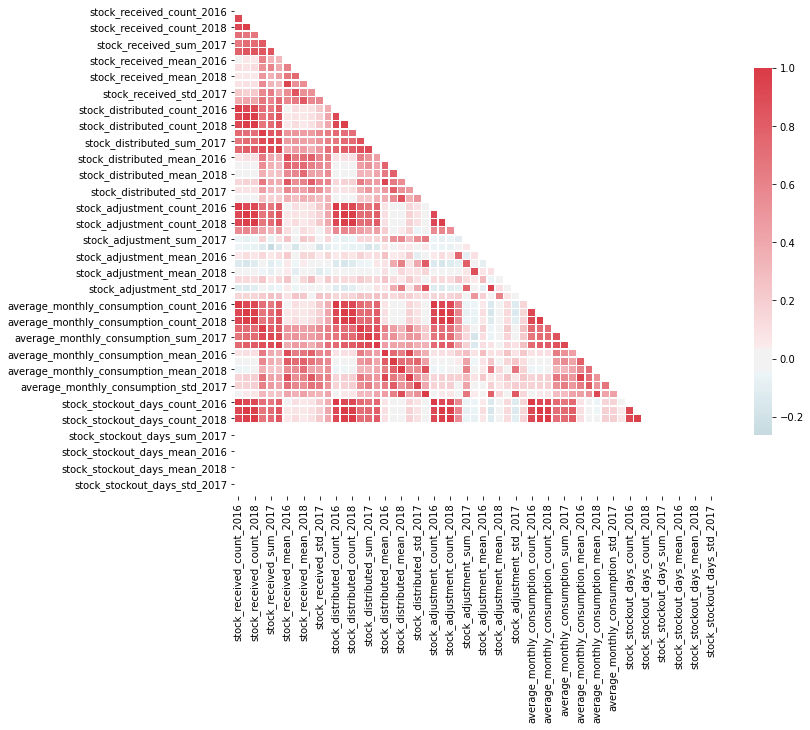

In [10]:
# Compute the correlation matrix
# log transform metrics for analysis
#corr = np.log(standardized_product_df+0.01).corr()
corr = standardized_district_df.corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

In [11]:
standardized_district_df = standardized_district_df.fillna(0)

In [12]:
from sklearn.decomposition import PCA
n_components = 10 #len(standardized_district_df) -1
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(standardized_district_df)
principalDf = pd.DataFrame(data = principalComponents , columns = ["comp_"+str(x) for x in  range(n_components)])

<AxesSubplot:title={'center':'PCA on District Data from 2016-2018'}, xlabel='comp_0', ylabel='comp_1'>

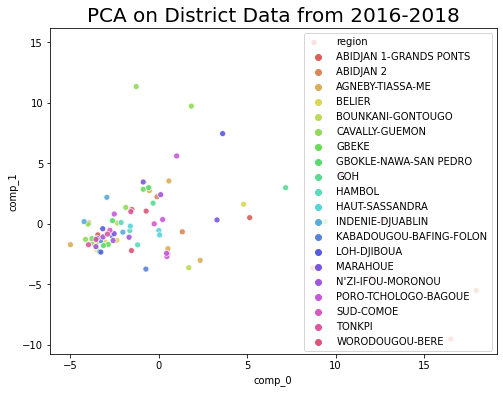

In [13]:
from sklearn.decomposition import PCA
n_components = 10 #len(standardized_product_df) -1
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(standardized_district_df)
principalDf = pd.DataFrame(data = principalComponents , columns = ["comp_"+str(x) for x in  range(n_components)])


pca_district_df = pd.concat([agg_by_district_lc_data,principalDf],axis=1)
# Create a map figure of the results
plt.figure(figsize=(8,6))
plt.title("PCA on District Data from 2016-2018",fontdict={'fontsize':20})
sns.scatterplot(
    x="comp_0", y="comp_1",
    hue="region",
    palette=sns.color_palette("hls", 20),
    data=pca_district_df,
    legend="full",
    alpha=0.9
)

<AxesSubplot:xlabel='comp_0', ylabel='comp_1'>

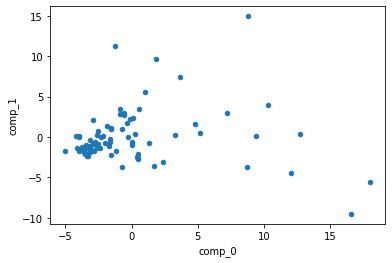

In [14]:
principalDf.plot.scatter(x="comp_0",y="comp_1")

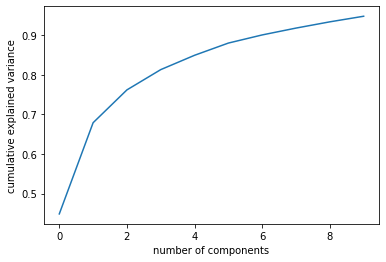

In [15]:
# How much of the variance is explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

<AxesSubplot:xlabel='comp_0', ylabel='comp_1'>

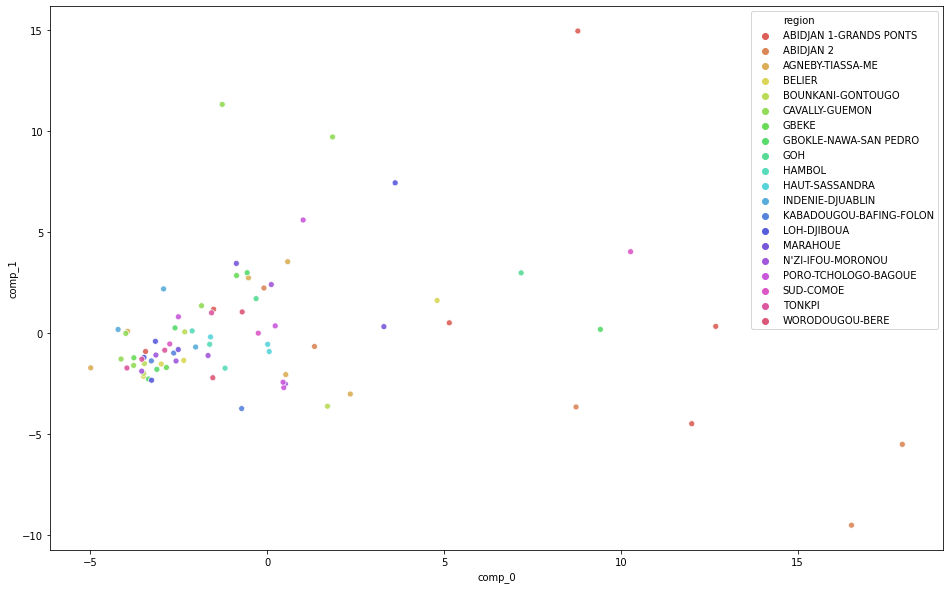

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="comp_0", y="comp_1",
    hue="region",
    palette=sns.color_palette("hls", 20),
    data=pca_district_df,
    legend="full",
    alpha=0.9
)

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(standardized_district_df)
pca_district_df['tsne_1']= tsne_results[:,0]
pca_district_df['tsne_2'] = tsne_results[:,1]

[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 3.227558
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.950397
[t-SNE] KL divergence after 300 iterations: 0.728291


<AxesSubplot:xlabel='tsne_1', ylabel='tsne_2'>

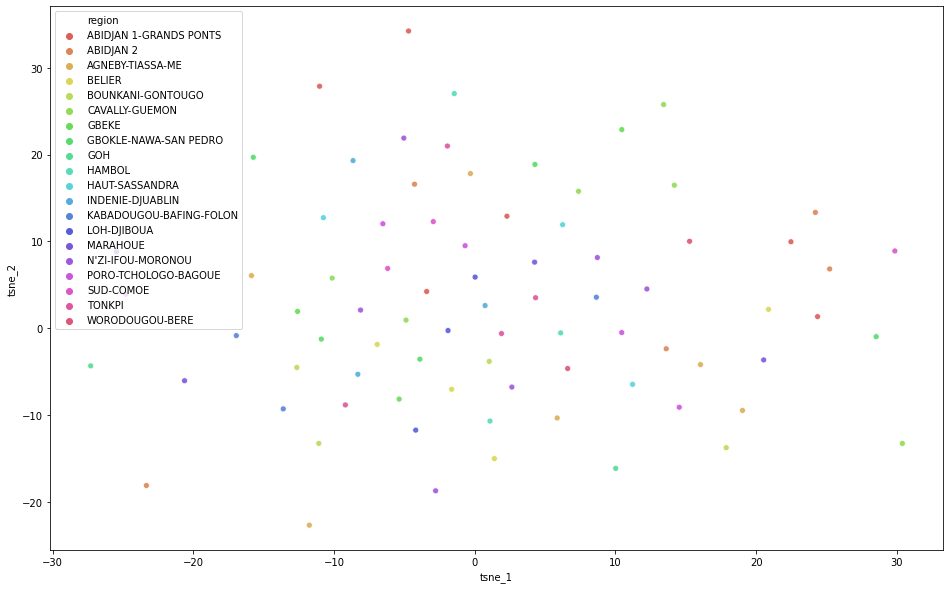

In [18]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="region",
    palette=sns.color_palette("hls", 20),
    data=pca_district_df,
    legend="full",
    alpha=0.9
)

/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


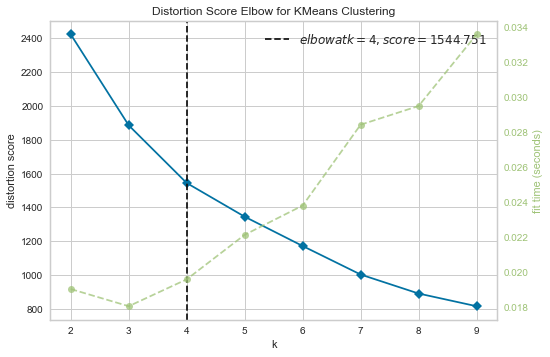

/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)

In [19]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer


# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), principalComponents, k=(2,10))

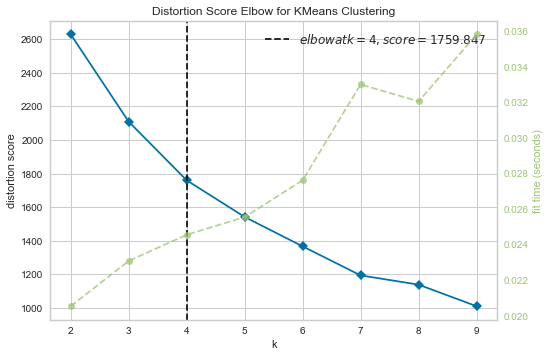

/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer


# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), standardized_district_df, k=(2,10))

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(principalComponents)
agg_by_district_lc_data['cluster_district'] =kmeans.fit_predict(principalComponents)
agg_by_district_lc_data.head()

,region,district,stock_received_count_2016,stock_received_count_2017,stock_received_count_2018,stock_received_sum_2016,stock_received_sum_2017,stock_received_sum_2018,stock_received_mean_2016,stock_received_mean_2017,...,stock_stockout_days_sum_2016,stock_stockout_days_sum_2017,stock_stockout_days_sum_2018,stock_stockout_days_mean_2016,stock_stockout_days_mean_2017,stock_stockout_days_mean_2018,stock_stockout_days_std_2016,stock_stockout_days_std_2017,stock_stockout_days_std_2018,cluster_district
0,ABIDJAN 1-GRANDS PONTS,ADJAME-PLATEAU-ATTECOUBE,370.0,375.0,510.0,6330.0,7123.0,8333.0,17.108108,18.994667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,ABIDJAN 1-GRANDS PONTS,DABOU,91.0,84.0,84.0,9686.0,2660.0,3769.0,106.439560,31.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,ABIDJAN 1-GRANDS PONTS,GRAND-LAHOU,39.0,81.0,75.0,230.0,610.0,950.0,5.897436,7.530864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ABIDJAN 1-GRANDS PONTS,JACQUEVILLE,70.0,84.0,84.0,685.0,1374.0,841.0,9.785714,16.357143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ABIDJAN 1-GRANDS PONTS,YOPOUGON-EST,205.0,193.0,243.0,4505.0,4758.0,4443.0,21.975610,24.652850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [23]:
agg_by_district_lc_data.to_csv("analytical_data/augmented_district_cluster.csv",index=False)